<a href="https://colab.research.google.com/github/matyi101/dataset/blob/main/Sales_Data_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/matyi101/dataset/main/retail_sales.csv'
df = pd.read_csv(url)
df.set_index('date', inplace=True )
df

,value
date,
1992-01-01,149918
1992-02-01,150595
1992-03-01,163324
1992-04-01,167859
1992-05-01,174365
...,...
2004-10-01,338441
2004-11-01,342523
2004-12-01,406081


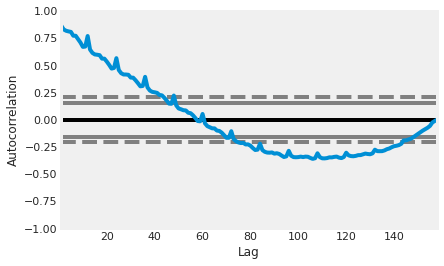

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  158
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1795.085
Date:                Thu, 27 May 2021   AIC                           3602.170
Time:                        16:34:31   BIC                           3620.507
Sample:                    01-01-1992   HQIC                          3609.617
                         - 02-01-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7244      0.049    -14.677      0.000      -0.821      -0.628
ar.L2         -0.6608      0.067     -9.878      0.000      -0.792      -0.530
ar.L3         -0.4815      0.071     -6.783      0.0

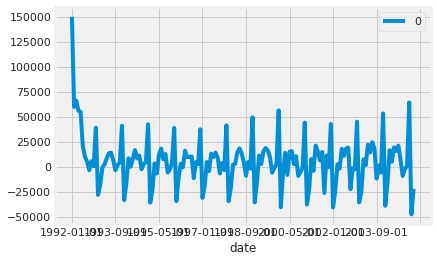

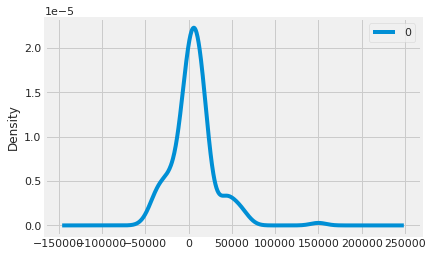

                   0
count     158.000000
mean     6041.141306
std     24631.846225
min    -47307.343644
25%     -4956.700171
50%      4919.244416
75%     15187.819418
max    149918.000000


In [ ]:

from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
df.index = df.index.to_period('M')
# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

AttributeError: ignored